In [59]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pathlib

#matplotlib.use('TkAgg')

'''
out_type can be: 'final' for the final output file of the model after all epochs,
                 'epoch' to select a specific epoch (see mode to determine which epoch file to use)
                 'opt' for optimal ratio output
'''
def moving_average(np_arr, window=1):
    return np.convolve(np_arr, np.ones(window), mode='valid')/window

def read_output_file(folder_name='', out_type='final', epoch=0, mode='absolute', avg_window_size=1):
    current_path = pathlib.Path().absolute()
    directory_path = current_path / folder_name
    
    if out_type == 'opt':
        filename = 'opt_set.out'
    elif out_type == 'final':
        filename = 'test.out'
    elif out_type == 'epoch':
        filename = 'test_'
        if mode == 'approx':
            filename += 'approx_'
        filename += str(epoch) + '.out'
    elif out_type == 'valid':
        filename = 'valid_set.out'
    else:
        print("Unrecognized output type")
        return None
        
    file_path = directory_path / filename
    return moving_average(np.loadtxt(file_path, dtype=np.float32), avg_window_size)

def plot_graph(data, title, x_axis='Minibatch', y_axis='Approx Ratio', save_name=None):
    fig, ax = plt.subplots()
    ax.plot(data)
    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_ylim(1, 2)
    ax.set_title(title)
    if save_name is not None:
        fig.savefig(save_name, format='svg')
    plt.show()

In [64]:
def show_runs(relative_folder_location, out_type='opt', avg_window_size=100):
    current_path = pathlib.Path().absolute()
    predictions_path = current_path / relative_folder_location
    
    for run in predictions_path.iterdir():
        title = run.parts[-1]
        if run.is_dir() and title != '.ipynb_checkpoints':
            if out_type == 'valid':
                try:
                    output = read_output_file(out_type=out_type, folder_name=run, avg_window_size=avg_window_size)
                    print(run)
                    print(np.average(output))
                except:
                    None
            else:
                try:
                    output = read_output_file(out_type=out_type, folder_name=run, avg_window_size=avg_window_size)
                    print(run)
                    plot_graph(output, title)
                except:
                    None

In [65]:
show_runs('runs/FeedbackVertex', out_type='valid', avg_window_size=1)

/home/apineci/cs159skurves.github.io/COLGE/runs/FeedbackVertex/M4QN5LR1E-2G099995BS128LRD75N20GCN
2.5422994184494017
/home/apineci/cs159skurves.github.io/COLGE/runs/FeedbackVertex/M4QN5LR1E-5G099999BS128LRD85N20E25S2V
1.3333333730697632
/home/apineci/cs159skurves.github.io/COLGE/runs/FeedbackVertex/P15QN5LR1E-4G09999LRD70N30
1.6987496423721313


/home/apineci/cs159skurves.github.io/COLGE/runs/MAXCUT/NG100M4QN3LR1E-5G099999BS64LRD85N20E25S2V


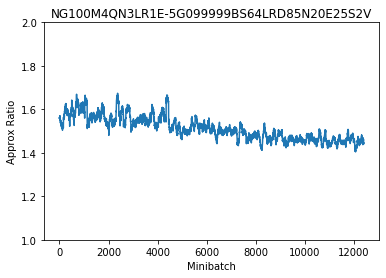

/home/apineci/cs159skurves.github.io/COLGE/runs/MAXCUT/NG100M4QN5LR1E-4G099999BS128LRD75N20E12S2V


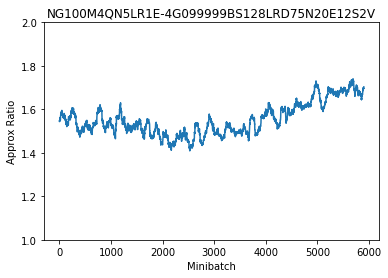

/home/apineci/cs159skurves.github.io/COLGE/runs/MAXCUT/NG200M4QN3LR1E-5G099999BS128LRD95N20E25S2V


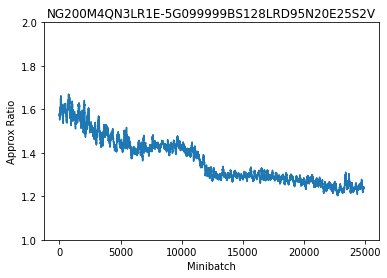

/home/apineci/cs159skurves.github.io/COLGE/runs/MAXCUT/NG200M4QN3LR1E-5G099999BS64LRD95N20E25S2V


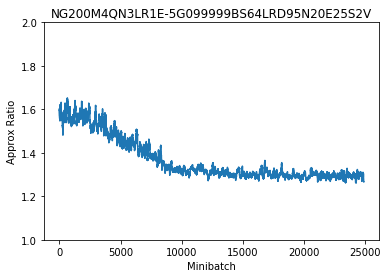

In [66]:
######################## NOTE ##############################
# Depending on when you made your output files, the code might or might not have been updated, so it might be necessary to 
# go to the function above and multiply the variable 'output' by -1 or take its reciprocal
show_runs('runs/MAXCUT', out_type='opt')

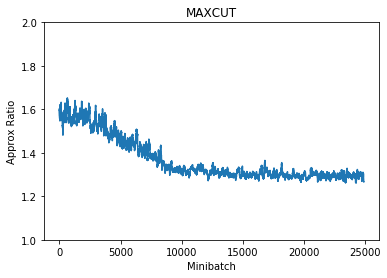

In [67]:
#I like the 4th one the best, lets save it
output = read_output_file(out_type='opt', folder_name='runs/MAXCUT/NG200M4QN3LR1E-5G099999BS64LRD95N20E25S2V', avg_window_size=100)
plot_graph(output, 'MAXCUT', save_name='images/MAXCUT.svg')